# Linear Regression using Tensorflow

- Level  : Beginner
- Author : Kilari Nikhil 
- Project: 

In [5]:
#Dependencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [7]:
#Hyperparameters
n_size = len(train_X)
learning_rate = 0.01
epochs = 100
display_step = 10 #prints output after specified epochs

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch :  10 Cost =  0.16064961
Epoch :  20 Cost =  0.16035777
Epoch :  30 Cost =  0.16006532
Epoch :  40 Cost =  0.15978701
Epoch :  50 Cost =  0.15952216
Epoch :  60 Cost =  0.1592701
Epoch :  70 Cost =  0.15903032
Epoch :  80 Cost =  0.15880215
Epoch :  90 Cost =  0.15858501
Epoch :  100 Cost =  0.15837838
Optimization finished
Training cost =  0.15837838 W =  0.27256507 b =  0.62239134


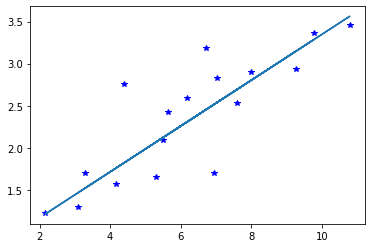

In [8]:
#Creating a graph
X = tf.placeholder(float)
Y = tf.placeholder(float)
W = tf.Variable(np.random.normal(),name = 'weight')
b = tf.Variable(np.random.normal(),name = 'bias')

pred = tf.add(tf.multiply(W,X),b)
cost = tf.reduce_sum(tf.pow(tf.subtract(pred,Y),2))/n_size
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#initialising variables 
init = tf.global_variables_initializer()

with tf.Session() as sess:
	sess.run(init)
	
	for epoch in range(epochs):
		for x,y in zip(train_X,train_Y):
			sess.run(optimizer,feed_dict={X: x, Y: y})
		#Displaying cost after certain number of epochs
		if ((epoch+1) % display_step) == 0:
			print("Epoch : ",epoch+1,"Cost = ",sess.run(cost,feed_dict = {X: train_X, Y: train_Y}))
	print("Optimization finished")
	final_cost = sess.run(cost,feed_dict = {X:train_X,Y:train_Y})
	print("Training cost = ",final_cost,"W = ",sess.run(W),"b = ",sess.run(b))
	
	#Display output in a graph using matplotlib
	plt.plot(train_X,train_Y,'b*',label = 'train_points')
	plt.plot(train_X,train_X * sess.run(W) + sess.run(b),label = 'Predicted line')
	plt.show()